In [61]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import traceback
import string
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
import numpy as np
from sklearn.linear_model import LogisticRegression 
import datetime
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
import xgboost as xgb
from xgboost import XGBClassifier

In [62]:
#import data
titanic = pd.read_csv('/Users/gurpreetkaur/Downloads/titanic.csv')

In [63]:
#Data Analysis 
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [64]:
#Checking the types of data
titanic.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [65]:
#total number of rows and columns
titanic.shape

(887, 8)

In [66]:
#checking for duplicate values
duplicate_rows_titanic = titanic[titanic.duplicated()]
print ('number of duplicate rows:', duplicate_rows_titanic.shape )

number of duplicate rows: (0, 8)


In [67]:
titanic.count()

Survived                   887
Pclass                     887
Name                       887
Sex                        887
Age                        887
Siblings/Spouses Aboard    887
Parents/Children Aboard    887
Fare                       887
dtype: int64

In [68]:
#missing value
titanic.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [69]:
#average age of people who survived / who not
titanic.groupby(['Survived']).agg({'Age' : ['mean']})

,Age
,mean
Survived,
0,30.138532
1,28.408392


In [70]:
#Creating some variables
survived = titanic[titanic['Survived'] == 1]
Not_survived = titanic[titanic['Survived'] == 0]

In [71]:
survived.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [72]:
#changing category
titanic['Sex'] = titanic['Sex'].astype('category')
titanic.dtypes

Survived                      int64
Pclass                        int64
Name                         object
Sex                        category
Age                         float64
Siblings/Spouses Aboard       int64
Parents/Children Aboard       int64
Fare                        float64
dtype: object

In [73]:
#Renaming columns 
titanic = titanic.rename(columns={'Siblings/Spouses Aboard': 'Siblings_Spouses_Aboard',
                        'Parents/Children Aboard': 'Parents_Children_Aboard'})

In [74]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [75]:
titanic['Pclass'] = pd.Categorical(titanic.Pclass)
titanic['Sex'] = pd.Categorical(titanic.Sex)
titanic['Siblings_Spouses_Aboard'] = pd.Categorical(titanic['Siblings_Spouses_Aboard'])
titanic['Parents_Children_Aboard'] = pd.Categorical(titanic['Parents_Children_Aboard'])

In [76]:
del titanic['Name']

In [77]:
titanic.dtypes

Survived                      int64
Pclass                     category
Sex                        category
Age                         float64
Siblings_Spouses_Aboard    category
Parents_Children_Aboard    category
Fare                        float64
dtype: object

In [20]:
#Using function to calculate WOE and IV
max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

In [28]:
#Calculating IV
P_A = char_bin(titanic['Survived'], titanic['Parents_Children_Aboard'])
P_A

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,0,0,674,233,0.345697,441,0.654303,0.681287,0.809174,-0.172031,0.113
1,VAR,1,1,118,65,0.550847,53,0.449153,0.190058,0.097248,0.670070,0.113
2,VAR,2,2,80,40,0.500000,40,0.500000,0.116959,0.073394,0.465975,0.113
3,VAR,3,3,5,3,0.600000,2,0.400000,0.008772,0.003670,0.871440,0.113
4,VAR,4,4,4,0,0.000000,4,1.000000,0.000000,0.007339,0.000000,0.113
5,VAR,5,5,5,1,0.200000,4,0.800000,0.002924,0.007339,-0.920319,0.113
6,VAR,6,6,1,0,0.000000,1,1.000000,0.000000,0.001835,0.000000,0.113


In [21]:
P = char_bin(titanic['Survived'], titanic['Pclass'])
P

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,1,1,216,136,0.629630,80,0.370370,0.397661,0.146789,0.996603,0.494288
1,VAR,2,2,184,87,0.472826,97,0.527174,0.254386,0.177982,0.357172,0.494288
2,VAR,3,3,487,119,0.244353,368,0.755647,0.347953,0.675229,-0.662984,0.494288


In [22]:
S = char_bin(titanic['Survived'], titanic['Sex'])
S

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,female,female,314,233,0.742038,81,0.257962,0.681287,0.148624,1.522564,1.334387
1,VAR,male,male,573,109,0.190227,464,0.809773,0.318713,0.851376,-0.982562,1.334387


In [27]:
S_A = char_bin(titanic['Survived'], titanic['Siblings_Spouses_Aboard'])
S_A

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,0,0,604,210,0.347682,394,0.652318,0.614035,0.722936,-0.163268,0.1403
1,VAR,1,1,209,112,0.535885,97,0.464115,0.327485,0.177982,0.609763,0.1403
2,VAR,2,2,28,13,0.464286,15,0.535714,0.038012,0.027523,0.322874,0.1403
3,VAR,3,3,16,4,0.250000,12,0.750000,0.011696,0.022018,-0.632637,0.1403
4,VAR,4,4,18,3,0.166667,15,0.833333,0.008772,0.027523,-1.143463,0.1403
5,VAR,5,5,5,0,0.000000,5,1.000000,0.000000,0.009174,0.000000,0.1403
6,VAR,8,8,7,0,0.000000,7,1.000000,0.000000,0.012844,0.000000,0.1403


In [24]:
F = mono_bin(titanic['Survived'], titanic['Fare'])
F

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,0.0000,7.9250,238,52,0.218487,186,0.781513,0.152047,0.341284,-0.808528,0.378032
1,VAR,8.0292,14.4542,206,60,0.291262,146,0.708738,0.175439,0.267890,-0.423287,0.378032
2,VAR,14.4583,31.0000,221,101,0.457014,120,0.542986,0.295322,0.220183,0.293604,0.378032
3,VAR,31.2750,512.3292,222,129,0.581081,93,0.418919,0.377193,0.170642,0.793188,0.378032


In [25]:
AG = mono_bin(titanic['Survived'], titanic['Age'])
AG

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,VAR,0.42,28.0,465,176,0.378495,289,0.621505,0.51462,0.530275,-0.029968,0.000982
1,VAR,28.50,80.0,422,166,0.393365,256,0.606635,0.48538,0.469725,0.032785,0.000982


In [81]:
#converting Pclass into continous variable 
titanic = pd.get_dummies(titanic, columns=['Pclass'])

In [82]:
titanic['Sex']=titanic['Sex'].cat.codes

In [85]:
titanic.head()

,Survived,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,7.2500,0,0,1
1,1,0,38.0,1,0,71.2833,1,0,0
2,1,0,26.0,0,0,7.9250,0,0,1
3,1,0,35.0,1,0,53.1000,1,0,0
4,0,1,35.0,0,0,8.0500,0,0,1


In [84]:
titanic.columns

Index(['Survived', 'Sex', 'Age', 'Siblings_Spouses_Aboard',
       'Parents_Children_Aboard', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [88]:
titanic = titanic.drop(columns=['Siblings_Spouses_Aboard', 'Parents_Children_Aboard'])

In [89]:
titanic.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,7.2500,0,0,1
1,1,0,38.0,71.2833,1,0,0
2,1,0,26.0,7.9250,0,0,1
3,1,0,35.0,53.1000,1,0,0
4,0,1,35.0,8.0500,0,0,1


In [90]:
x = titanic.iloc[:,1:6]
x.head()

,Sex,Age,Fare,Pclass_1,Pclass_2
0,1,22.0,7.2500,0,0
1,0,38.0,71.2833,1,0
2,0,26.0,7.9250,0,0
3,0,35.0,53.1000,1,0
4,1,35.0,8.0500,0,0


In [91]:
y = titanic.iloc[:,0]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [92]:
x.shape

(887, 5)

In [93]:
y.shape

(887,)

In [94]:
#2.split those into train X , train Y, test X and Test Y
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)

In [95]:
X_train, X_test, y_train, y_test

(     Sex   Age     Fare  Pclass_1  Pclass_2
 363    1  30.0   7.2500         0         0
 255    0  38.0  79.2000         1         0
 476    0   2.0  12.2875         0         0
 271    1  37.0  29.7000         1         0
 553    0  48.0  39.6000         1         0
 ..   ...   ...      ...       ...       ...
 835    1  29.0  29.7000         1         0
 192    1   3.0  26.0000         0         1
 629    1  32.0  30.5000         1         0
 559    1  28.0  13.5000         0         1
 684    1  19.0  10.1708         0         0
 
 [709 rows x 5 columns],
      Sex   Age     Fare  Pclass_1  Pclass_2
 14     0  14.0   7.8542         0         0
 158    1   5.0  69.5500         0         0
 762    1  46.0  39.6000         1         0
 740    1  31.0   7.9250         0         0
 482    0   8.0  25.4667         0         0
 ..   ...   ...      ...       ...       ...
 834    1  32.0  56.4958         0         0
 672    1  18.0   7.7750         0         0
 181    1   9.0  31.3875    

In [31]:
print(len(X_test))
print(len(X_train))
print(len(titanic))

178
709
887


In [96]:
#XG-Boost
xgb = XGBClassifier()

In [97]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
pred = xgb.predict(X_test)
pred

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1])

In [100]:
accuracy_score(y_test, pred)

0.7921348314606742

In [102]:
scores = cross_val_score(xgb, X_train, y_train, cv=6, scoring='accuracy')
scores 

array([0.79831933, 0.81355932, 0.79661017, 0.77118644, 0.74576271,
       0.83050847])

In [103]:
scores.mean()

0.7926577410625267

In [104]:
print("Precision:",metrics.precision_score(y_test, pred))
print("Recall:",metrics.recall_score(y_test, pred))

Precision: 0.7
Recall: 0.6885245901639344


In [105]:
#confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrix 

array([[99, 18],
       [19, 42]])

Text(0.5, 15.0, 'Predicted label')

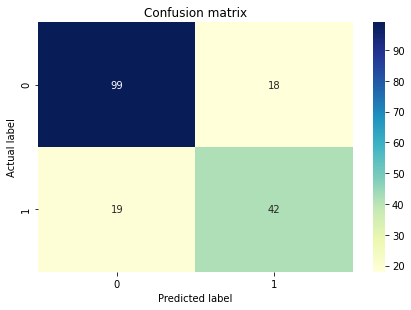

In [106]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')